In [7]:
import json
import time

import numpy as np
import seaborn as sn

from classify import classify_subcategory

np.random.seed(0)

questions = open('tossups.json').readlines() + open('bonuses.json').readlines()
np.random.shuffle(questions)
questions = questions[:int(0.2*len(questions))]
print('Number of questions in test set:', len(questions))

with open('subcategories.txt') as f:
    SUBCATEGORIES = [line.strip() for line in f.readlines()]

Number of questions in test set: 49822


In [8]:
EPSILON = 0.00001

print('=====Begin Testing=====')
time_now = time.perf_counter()

counter = 0
correct = 0
confusion_matrix = [[0 for _ in range(len(SUBCATEGORIES))] for _ in range(len(SUBCATEGORIES))]

for line in questions:
    data = json.loads(line)

    if 'subcategory' not in data:
        continue

    subcategory = data['subcategory']

    if subcategory not in SUBCATEGORIES:
        continue

    counter += 1

    if data['type'] == 'tossup':
        prediction = classify_subcategory(data['question'] + ' ' + data['answer'], EPSILON)

    if data['type'] == 'bonus' and 'parts' in data and len(data['parts']) == 3:
        prediction = classify_subcategory(data['leadin'] + ' ' + ' '.join(data['parts']) + ' ' + ' '.join(data['answers']), EPSILON)

    subcategory_index = SUBCATEGORIES.index(subcategory)
    prediction_index = SUBCATEGORIES.index(prediction)

    confusion_matrix[subcategory_index][prediction_index] += 1

    if subcategory == prediction:
        correct += 1

    if counter % 10000 == 0:
        print(f'{correct}/{counter}')

print('=====End Testing=====')
print(f'Accuracy: {100 * correct / counter}% ({correct}/{counter})')
print(f'Time: {time.perf_counter() - time_now} seconds')

=====Begin Testing=====
8300/10000
16614/20000
24951/30000
33257/40000
=====End Testing=====
Accuracy: 83.23360706474642% (40340/48466)
Time: 27.263177768996684 seconds


In [9]:
for i, subcat in enumerate(SUBCATEGORIES):
    accuracy = 0.0 if sum(confusion_matrix[i]) == 0 else confusion_matrix[i][i] / sum(confusion_matrix[i])
    accuracy = round(100 * accuracy, 2)
    print(f'{subcat + ":":21} {str(confusion_matrix[i][i]) + "/" + str(sum(confusion_matrix[i])):10} ({accuracy}%)')

American Literature:  2608/3266  (79.85%)
British Literature:   2302/2650  (86.87%)
European Literature:  1844/2126  (86.74%)
World Literature:     1310/1570  (83.44%)
American History:     2552/3193  (79.92%)
Ancient History:      511/609    (83.91%)
European History:     2993/3839  (77.96%)
World History:        2137/2772  (77.09%)
Biology:              2315/2618  (88.43%)
Chemistry:            1899/2186  (86.87%)
Physics:              2356/2707  (87.03%)
Math:                 712/790    (90.13%)
Other Science:        1359/1796  (75.67%)
Visual Fine Arts:     2539/2932  (86.6%)
Auditory Fine Arts:   2348/2793  (84.07%)
Other Fine Arts:      958/1377   (69.57%)
Religion:             1664/1897  (87.72%)
Mythology:            2169/2445  (88.71%)
Philosophy:           1831/2066  (88.63%)
Social Science:       1547/1806  (85.66%)
Current Events:       297/435    (68.28%)
Geography:            1230/1518  (81.03%)
Trash:                859/1075   (79.91%)


In [10]:
print('Confusion Matrix:')
for subcat, row in zip(SUBCATEGORIES, confusion_matrix):
    print(f'{subcat:20}', row)

Confusion Matrix:
American Literature  [2608, 123, 116, 104, 32, 1, 13, 7, 3, 3, 6, 1, 2, 7, 1, 31, 13, 11, 32, 22, 4, 4, 122]
British Literature   [98, 2302, 66, 52, 9, 5, 19, 6, 2, 4, 2, 0, 3, 3, 0, 13, 8, 17, 7, 11, 0, 3, 20]
European Literature  [49, 72, 1844, 47, 1, 3, 18, 7, 2, 4, 0, 1, 1, 4, 2, 9, 8, 22, 10, 3, 4, 2, 13]
World Literature     [71, 36, 58, 1310, 5, 3, 1, 15, 1, 1, 1, 3, 0, 1, 2, 7, 7, 17, 12, 3, 3, 2, 11]
American History     [48, 14, 5, 5, 2552, 15, 75, 77, 4, 6, 4, 1, 6, 9, 7, 18, 22, 7, 13, 29, 125, 78, 73]
Ancient History      [3, 3, 1, 1, 3, 511, 29, 19, 0, 0, 3, 1, 1, 1, 2, 0, 10, 10, 2, 1, 0, 7, 1]
European History     [15, 25, 13, 6, 96, 182, 2993, 134, 6, 5, 3, 1, 7, 26, 11, 24, 41, 9, 30, 28, 55, 101, 28]
World History        [8, 9, 1, 23, 48, 107, 102, 2137, 0, 6, 1, 0, 4, 12, 3, 16, 31, 13, 8, 15, 104, 108, 16]
Biology              [8, 3, 8, 5, 16, 4, 6, 6, 2315, 62, 14, 6, 53, 1, 4, 8, 6, 6, 2, 51, 8, 19, 7]
Chemistry            [0, 3, 2, 0, 2, 4, 5, 

<AxesSubplot:>

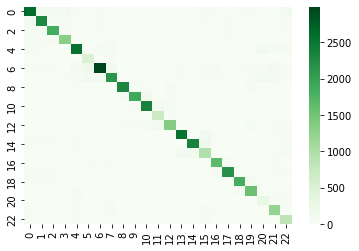

In [11]:
sn.heatmap(confusion_matrix, cmap='Greens', annot=False)

<AxesSubplot:>

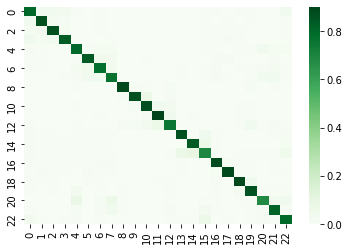

In [12]:
# use relative proportions instead of absolute values
sn.heatmap([[confusion_matrix[i][j] / sum(confusion_matrix[i]) for j in range(len(confusion_matrix[i]))] for i in range(len(confusion_matrix))], cmap='Greens', annot=False)